## Tugas Pemrograman 2 Machine Learning Classification
## Naive Bayes and Logistic Regression
### Imam Rafiif Arrazaan (1301194152) IF4307
### Arvinda Dwi Safira (1301190083) IF4307


In [ ]:
pip install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 1.3 MB 10.3 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=2c196fdfab053a6802c33f691985a7a066812d5d5dbcddefa9636cb84964f47f
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from googletrans import Translator
translator = Translator()
t = translator.detect('이 문장은 한글로 쓰여졌습니다.')
print(t.lang)

ko


# Eksplorasi dan Persiapan Data (NB)

In [ ]:
# import data
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import gdown

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# download data
!gdown --id 1o5q4R7U67sa9ltjjLd7cOxWrAVoVRVFR
!gdown --id 1hBBtVEpkfk-A9gzmKiFnO-MEIrmnsMk1

Downloading...
From: https://drive.google.com/uc?id=1o5q4R7U67sa9ltjjLd7cOxWrAVoVRVFR
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 41.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hBBtVEpkfk-A9gzmKiFnO-MEIrmnsMk1
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 53.7MB/s]


## Train Data NB

In [ ]:
# import data
df = pd.read_csv('kendaraan_train.csv')

In [ ]:
# show data
df.head()

id Jenis_Kelamin  Umur  ...  Kanal_Penjualan  Lama_Berlangganan  Tertarik
0   1        Wanita  30.0  ...            152.0               97.0         0
1   2          Pria  48.0  ...             29.0              158.0         0
2   3           NaN  21.0  ...            160.0              119.0         0
3   4        Wanita  58.0  ...            124.0               63.0         0
4   5          Pria  50.0  ...             88.0              194.0         0

[5 rows x 12 columns]

In [ ]:
# show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
# check duplicated data and missing value
print(df.duplicated().sum())
print(df.isna().sum().sum())

0
142916


In [ ]:
# check missing value each variable
df.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
# drop missing value
df1 = df.dropna(subset = ['Jenis_Kelamin', 'SIM', 'Kode_Daerah',
                          'Sudah_Asuransi', 'Umur_Kendaraan', 
                          'Kendaraan_Rusak', 'Kanal_Penjualan'])
df1.isna().sum()

id                       0
Jenis_Kelamin            0
Umur                  9915
SIM                      0
Kode_Daerah              0
Sudah_Asuransi           0
Umur_Kendaraan           0
Kendaraan_Rusak          0
Premi                10246
Kanal_Penjualan          0
Lama_Berlangganan     9732
Tertarik                 0
dtype: int64

In [ ]:
# show data
df1.head()

id Jenis_Kelamin  Umur  ...  Kanal_Penjualan  Lama_Berlangganan  Tertarik
0   1        Wanita  30.0  ...            152.0               97.0         0
1   2          Pria  48.0  ...             29.0              158.0         0
3   4        Wanita  58.0  ...            124.0               63.0         0
5   6          Pria  21.0  ...            152.0              171.0         0
8   9        Wanita  20.0  ...            160.0               31.0         0

[5 rows x 12 columns]

In [ ]:
# show data description
df1.describe()

id           Umur  ...  Lama_Berlangganan       Tertarik
count  199438.000000  189523.000000  ...      189706.000000  199438.000000
mean   142958.280679      38.822897  ...         154.333205       0.122008
std     82449.236473      15.536194  ...          83.836803       0.327296
min         1.000000      20.000000  ...          10.000000       0.000000
25%     71559.250000      25.000000  ...          82.000000       0.000000
50%    143064.500000      36.000000  ...         154.000000       0.000000
75%    214251.750000      49.000000  ...         227.000000       0.000000
max    285831.000000      85.000000  ...         299.000000       1.000000

[8 rows x 9 columns]

In [ ]:
# fill the row that has missing value with mean of the df1
df1.fillna(df1.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# check missing value each variable
df1.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
# df2 with id, Umur, and Lama_berlangganan from df1
df2 = df1[['id', 'Umur', 'Premi', 'Lama_Berlangganan']]

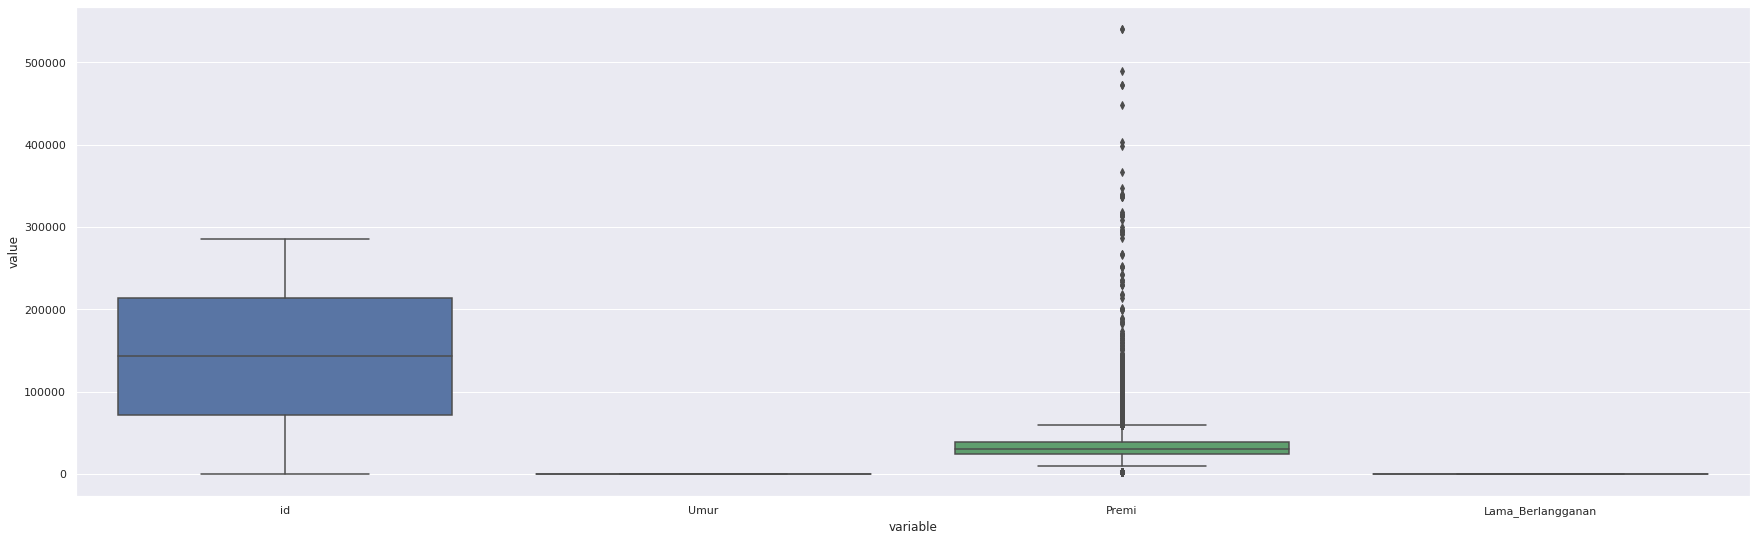

In [ ]:
# check outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,9)})
sns.boxplot(x="variable", y="value", data=pd.melt(df2))

plt.show()

In [ ]:
# handling outliers
from scipy import stats
z = np.abs(stats.zscore(df2))
print(z)

[[1.73388675e+00 5.82560092e-01 1.48922090e-01 7.01190590e-01]
 [1.73387463e+00 6.05947615e-01 2.82398908e-01 4.48452533e-02]
 [1.73385037e+00 1.26622967e+00 1.66986319e+00 1.11701385e+00]
 ...
 [1.73283688e+00 1.04475753e+00 1.15183316e+00 8.76491768e-01]
 [1.73284901e+00 1.92651173e+00 7.74199091e-04 1.41461598e+00]
 [1.73286114e+00 4.07862997e-01 3.57140086e-01 1.34938567e+00]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([   530,   1110,   1621, ..., 199207, 199292, 199340]), array([2, 2, 2, ..., 2, 2, 2]))


In [ ]:
df3 = df2[(z < 3).all(axis=1)]

In [ ]:
print(df2.shape)
print(df3.shape)

(199438, 4)
(198315, 4)


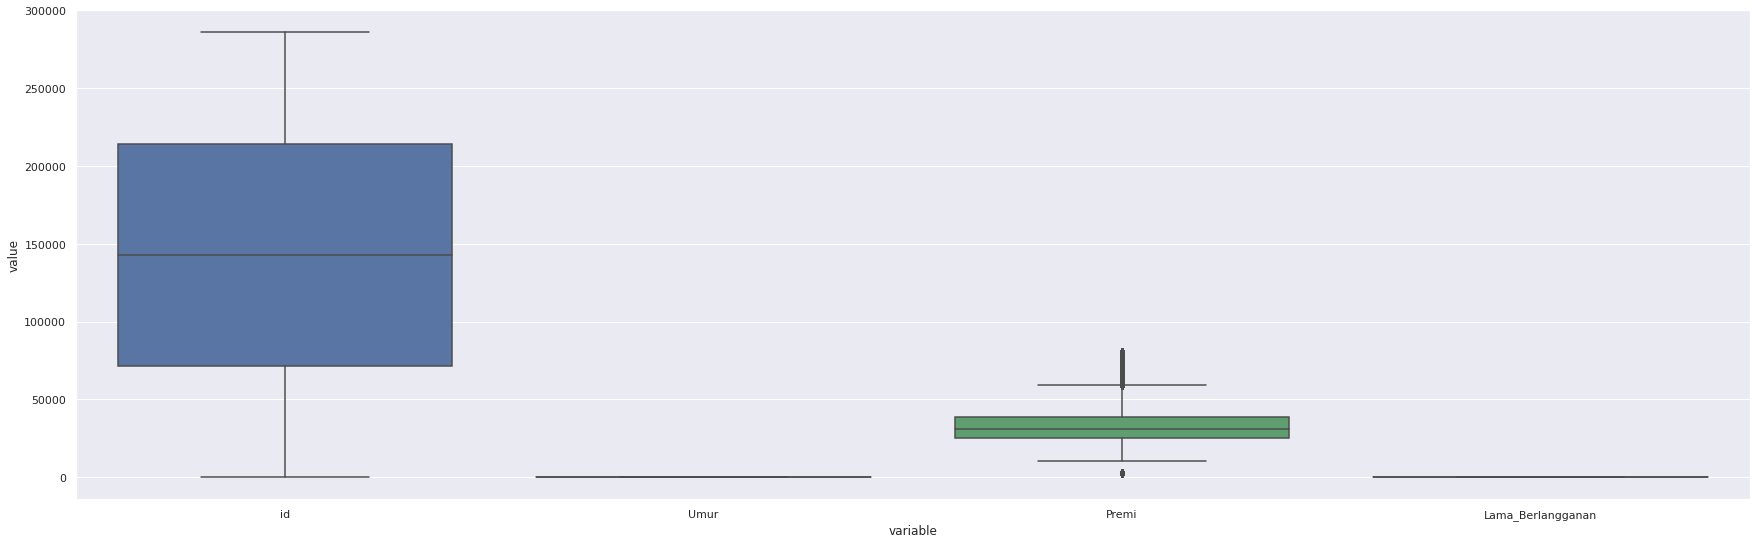

In [ ]:
# check outliers 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,9)})
sns.boxplot(x="variable", y="value", data=pd.melt(df3))

plt.show()

In [ ]:
# check correlation between variables
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
def heatmap(data):
  sns.heatmap(data.corr(), vmax=1, annot=True, cmap='Pastel1')

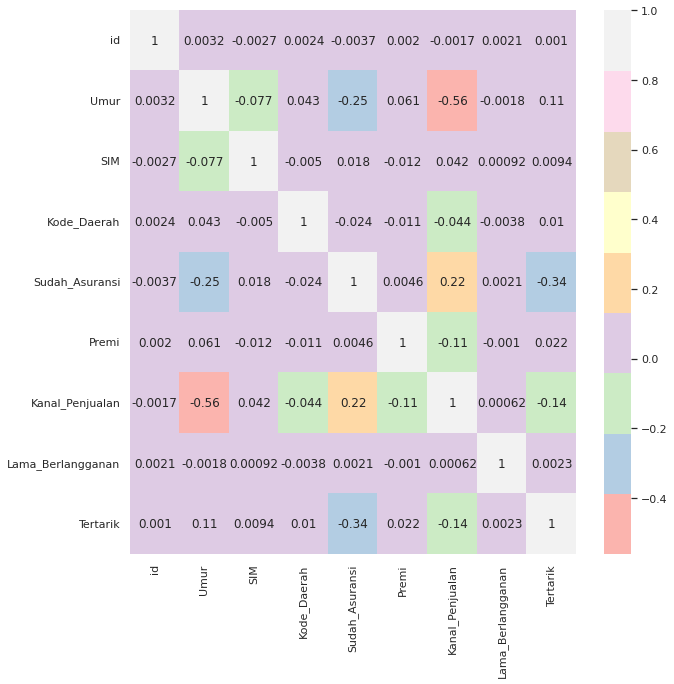

In [ ]:
heatmap(df1)

In [ ]:
#df2 = df2.drop(['Tertarik'], axis=1)
dfn = df1[['Sudah_Asuransi','Kendaraan_Rusak', 'Umur_Kendaraan', 'Tertarik']]
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199438 entries, 0 to 285830
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sudah_Asuransi   199438 non-null  float64
 1   Kendaraan_Rusak  199438 non-null  object 
 2   Umur_Kendaraan   199438 non-null  object 
 3   Tertarik         199438 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ MB


In [ ]:
dfn = dfn.astype(str)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199438 entries, 0 to 285830
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Sudah_Asuransi   199438 non-null  object
 1   Kendaraan_Rusak  199438 non-null  object
 2   Umur_Kendaraan   199438 non-null  object
 3   Tertarik         199438 non-null  object
dtypes: object(4)
memory usage: 7.6+ MB


In [ ]:
# berdasarkan 3 kolom, mengumpulkan data2 di kolom yang hasil tertariknya = 1
str_tertarik = ''
str_tidakTertarik = ''
 
n_true = 0
n_false = 0

for _, data in dfn.iterrows():
  if data['Tertarik']=="1":
    str_tertarik += data['Sudah_Asuransi'] + '_' + data['Kendaraan_Rusak'] + '_' + data['Umur_Kendaraan'] + '_'
    n_true += 1
  else:
    str_tidakTertarik += data['Sudah_Asuransi'] + '_' + data['Kendaraan_Rusak'] + '_' + data['Umur_Kendaraan'] + '_'
    n_false += 1

In [ ]:
str_tertarik

'0.0_Pernah_> 2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_> 2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_> 2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Tidak_1-2 Tahun_0.0_Pernah_1-

In [ ]:
str_tidakTertarik

'1.0_Tidak_< 1 Tahun_0.0_Pernah_> 2 Tahun_0.0_Tidak_1-2 Tahun_1.0_Tidak_< 1 Tahun_1.0_Tidak_< 1 Tahun_1.0_Tidak_< 1 Tahun_1.0_Tidak_< 1 Tahun_1.0_Tidak_1-2 Tahun_0.0_Pernah_< 1 Tahun_1.0_Tidak_< 1 Tahun_0.0_Pernah_< 1 Tahun_1.0_Tidak_< 1 Tahun_1.0_Tidak_< 1 Tahun_1.0_Tidak_1-2 Tahun_0.0_Pernah_1-2 Tahun_1.0_Pernah_< 1 Tahun_1.0_Tidak_< 1 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Tidak_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_1.0_Tidak_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_1-2 Tahun_1.0_Pernah_< 1 Tahun_1.0_Tidak_< 1 Tahun_0.0_Pernah_> 2 Tahun_1.0_Tidak_< 1 Tahun_1.0_Tidak_< 1 Tahun_0.0_Pernah_1-2 Tahun_1.0_Tidak_1-2 Tahun_1.0_Tidak_< 1 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_0.0_Pernah_< 1 Tahun_0.0_Pernah_1-2 Tahun_1.0_Tidak_< 1 Tahun_1.0_Tidak_< 1 Tahun_1.0_Pernah_1-2 Tahun_1.0_Tidak_1-2 Tahun_0.0_Tidak_1-2 Tahun_1.0_Tidak_< 1 Tahun_0.0_Tidak_1-2 Tahun_1.0_Tidak_< 1 Ta

In [ ]:
V = len(set((str_tertarik + ' ' + str_tidakTertarik).split()))
V

17

In [ ]:
# menampung setiap data yang tertarik = 1
bow_tertarik = {}
bow_tidakTertarik = {}

for word in str_tertarik.split('_'):
  if word in bow_tertarik.keys():
    bow_tertarik[word] += 1
  else:
    bow_tertarik[word] = 1

for word in str_tidakTertarik.split('_'):
  if word in bow_tidakTertarik.keys():
    bow_tidakTertarik[word] += 1
  else:
    bow_tidakTertarik[word] = 1

In [ ]:
bow_tertarik

{'': 1,
 '0.0': 24254,
 '1-2 Tahun': 18077,
 '1.0': 79,
 '< 1 Tahun': 3756,
 '> 2 Tahun': 2500,
 'Pernah': 23836,
 'Tidak': 497}

In [ ]:
bow_tidakTertarik

{'': 1,
 '0.0': 83514,
 '1-2 Tahun': 86479,
 '1.0': 91591,
 '< 1 Tahun': 82751,
 '> 2 Tahun': 5875,
 'Pernah': 76783,
 'Tidak': 98322}

In [ ]:
sum_bow_tertarik = sum(bow_tertarik.values()) + V + 1
sum_bow_tidakTertarik = sum(bow_tidakTertarik.values()) + V + 1
print(sum_bow_tertarik, sum_bow_tidakTertarik)

73026 525342


In [ ]:
for key in bow_tertarik.keys():
  bow_tertarik[key] += 1

for key in bow_tidakTertarik.keys():
  bow_tidakTertarik[key] += 1

In [ ]:
bow_tertarik

{'': 2,
 '0.0': 24255,
 '1-2 Tahun': 18078,
 '1.0': 80,
 '< 1 Tahun': 3757,
 '> 2 Tahun': 2501,
 'Pernah': 23837,
 'Tidak': 498}

In [ ]:
bow_tidakTertarik

{'': 2,
 '0.0': 83515,
 '1-2 Tahun': 86480,
 '1.0': 91592,
 '< 1 Tahun': 82752,
 '> 2 Tahun': 5876,
 'Pernah': 76784,
 'Tidak': 98323}

In [ ]:
# menghitung probabilitas bag of word
bow_tertarik_prob = {}
bow_tidakTertarik_prob = {}

for key in bow_tertarik.keys():
  bow_tertarik_prob[key] = bow_tertarik[key] / sum_bow_tertarik
  
for key in bow_tidakTertarik.keys():
  bow_tidakTertarik_prob[key] = bow_tidakTertarik[key] / sum_bow_tidakTertarik

In [ ]:
bow_tertarik_prob

{'': 2.739050645046427e-05,
 '0.0': 0.3321783669780054,
 '1-2 Tahun': 0.24758278780574652,
 '1.0': 0.0010956202580185708,
 '< 1 Tahun': 0.05145306636719713,
 '> 2 Tahun': 0.03425182831630557,
 'Pernah': 0.3264537511298584,
 'Tidak': 0.006820236106165603}

In [ ]:
bow_tidakTertarik_prob

{'': 3.807101767637351e-06,
 '0.0': 0.15897505206211668,
 '1-2 Tahun': 0.16461908043263904,
 '1.0': 0.17435003255072012,
 '< 1 Tahun': 0.15752264273776304,
 '> 2 Tahun': 0.011185264993318537,
 'Pernah': 0.14616225106313316,
 'Tidak': 0.18716283354970362}

## Test Data NB

In [ ]:
df_test = pd.read_csv('kendaraan_test.csv')
df_test

Jenis_Kelamin  Umur  SIM  ...  Kanal_Penjualan  Lama_Berlangganan Tertarik
0            Wanita    49    1  ...               26                145        0
1              Pria    22    1  ...              152                241        0
2              Pria    24    1  ...              152                 62        0
3              Pria    46    1  ...              124                 34        0
4              Pria    35    1  ...              152                229        0
...             ...   ...  ...  ...              ...                ...      ...
47634          Pria    61    1  ...              124                 67        0
47635          Pria    41    1  ...              157                232        0
47636          Pria    24    1  ...              152                211        0
47637          Pria    59    1  ...               26                239        1
47638          Pria    52    1  ...              124                170        0

[47639 rows x 11 columns]

In [ ]:
#df2 = df2.drop(['Tertarik'], axis=1)
df1_test = df_test[['Sudah_Asuransi','Kendaraan_Rusak', 'Umur_Kendaraan', 'Tertarik']]
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sudah_Asuransi   47639 non-null  int64 
 1   Kendaraan_Rusak  47639 non-null  object
 2   Umur_Kendaraan   47639 non-null  object
 3   Tertarik         47639 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
df1_test['Sudah_Asuransi'] = df1_test['Sudah_Asuransi'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1_test = df1_test.astype(str)
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sudah_Asuransi   47639 non-null  object
 1   Kendaraan_Rusak  47639 non-null  object
 2   Umur_Kendaraan   47639 non-null  object
 3   Tertarik         47639 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


# Prediksi Naive Bayes

In [ ]:
# Function for predicting the possible cases
def pred(sentence):
  res_true = 1
  res_false = 1

  for word in sentence.split():
    if word in bow_tertarik.keys():
      res_true *= bow_tertarik_prob[word]
    else:
      res_true *= 1 / sum_bow_tertarik

  for word in sentence.split():
    if word in bow_tidakTertarik.keys():
      res_false *= bow_tidakTertarik_prob[word]
    else:
      res_false *= 1 / sum_bow_tidakTertarik
    
  res_true *= n_true / (n_true + n_false)
  res_false *= n_false / (n_true + n_false)

  if res_true > res_false:
    return 1
  else:
    return 0

In [ ]:
# Prediction on test set
list1 = list(df1_test['Sudah_Asuransi'])
list2 = list(df1_test['Kendaraan_Rusak'])
list3 = list(df1_test['Umur_Kendaraan'])
  
res = list(zip(list1, list2, list3))
  
# printing result
# print ("All possible permutations are : " +  str(res))

In [ ]:
len(res)

47639

In [ ]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))
        
# Driver code    
dat = []*len(res)
for i in range(len(res)):
  dat.append(listToString(res[i]))


In [ ]:
test = pd.DataFrame({'Spec':dat})
test.tail()

Spec
47634  0.0 Pernah > 2 Tahun
47635  0.0 Pernah 1-2 Tahun
47636   1.0 Tidak < 1 Tahun
47637  0.0 Pernah 1-2 Tahun
47638   0.0 Tidak 1-2 Tahun

In [ ]:
hasil = []
for i in range(len(dat)):
  hasil.append(pred(dat[i]))

In [ ]:
test['Tertarik'] = hasil
test.head()

Spec  Tertarik
0  0.0 Pernah 1-2 Tahun         1
1   1.0 Tidak < 1 Tahun         0
2   1.0 Tidak < 1 Tahun         0
3   1.0 Tidak 1-2 Tahun         0
4  0.0 Pernah 1-2 Tahun         1

In [ ]:
a = test['Tertarik']
b = df_test['Tertarik']

In [ ]:
print("Akurasi: ", end="")
sum(1 for x,y in zip(a,b) if x == y) / float(len(a))

Akurasi: 

0.6104872058607443

In [ ]:
print(confusion_matrix(b, a))
tn, fp, fn, tp = confusion_matrix(b, a).ravel()
print(tn, fp, fn, tp)
print(classification_report(b, a))
print("Accuracy:",metrics.accuracy_score(b, a))

[[23318 18460]
 [   96  5765]]
23318 18460 96 5765
              precision    recall  f1-score   support

           0       1.00      0.56      0.72     41778
           1       0.24      0.98      0.38      5861

    accuracy                           0.61     47639
   macro avg       0.62      0.77      0.55     47639
weighted avg       0.90      0.61      0.67     47639

Accuracy: 0.6104872058607443


# Eksplorasi dan Persiapan Data (LG)

## Train Data LG

In [ ]:
#df2 = df2.drop(['Tertarik'], axis=1)
df_train_LGn = df1[['Sudah_Asuransi','Kendaraan_Rusak', 'Umur_Kendaraan', 'Tertarik']]
df_train_LGn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199438 entries, 0 to 285830
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sudah_Asuransi   199438 non-null  float64
 1   Kendaraan_Rusak  199438 non-null  object 
 2   Umur_Kendaraan   199438 non-null  object 
 3   Tertarik         199438 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ MB


In [ ]:
# mengubah data string menjadi angka sesuai data
labelencoder = LabelEncoder()
df_train_LGn['Umur_Kendaraan'] = labelencoder.fit_transform(df_train_LGn['Umur_Kendaraan'])
df_train_LGn['Kendaraan_Rusak'] = labelencoder.fit_transform(df_train_LGn['Kendaraan_Rusak'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# normalisasi agar range tidak terlalu besar
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
scaled_features = sc_X.fit_transform(df_train_LGn)
scaled_features_df = pd.DataFrame(scaled_features, 
                                  index=df_train_LGn.index, columns=df_train_LGn.columns)

## Test Data LG

In [ ]:
df_test_LG = pd.read_csv('kendaraan_test.csv')

In [ ]:
labelencoder = LabelEncoder()
df_test_LG['Umur_Kendaraan'] = labelencoder.fit_transform(df_test_LG['Umur_Kendaraan'])

In [ ]:
df_test_LG['Jenis_Kelamin'] = labelencoder.fit_transform(df_test_LG['Jenis_Kelamin'])
df_test_LG['Kendaraan_Rusak'] = labelencoder.fit_transform(df_test_LG['Kendaraan_Rusak'])

In [ ]:
df_test_LG1 = df_test_LG[['Sudah_Asuransi','Kendaraan_Rusak', 'Umur_Kendaraan']]

In [ ]:
scaled_features1 = sc_X.fit_transform(df_test_LG1)
scaled_features_df1 = pd.DataFrame(scaled_features1, index=df_test_LG1.index, columns=df_test_LG1.columns)

In [ ]:
scaled_features_df = scaled_features_df.reset_index()

In [ ]:
scaled_features_df1 = scaled_features_df1.reset_index()

In [ ]:
scaled_features_df_final = scaled_features_df[['Sudah_Asuransi','Kendaraan_Rusak', 'Umur_Kendaraan']]

In [ ]:
scaled_features_df1_final = scaled_features_df1[['Sudah_Asuransi','Kendaraan_Rusak', 'Umur_Kendaraan']]

In [ ]:
y_train = df_train_LGn[['Tertarik']]
y_train = y_train.reset_index()
y_test = df_test_LG[['Tertarik']]
y_test = y_test.reset_index()

# Prediksi Logistic Regression

In [ ]:
class LogisticRegression() :
	def __init__(self, learning_rate, iterations):
		self.learning_rate = learning_rate		
		self.iterations = iterations
		
	# Function for model training	
	def fit(self, X, Y):		
		# no of trainin examples, no of features		
		self.m, self.n = X.shape

		# weight initialization		
		self.W = np.zeros(self.n)		
		self.b = 0		
		self.X = X		
		self.Y = Y
		
		# gradient descent learning	
		for i in range(self.iterations) :			
			self.update_weights()			
		return self
	
	# Helper function to update weights in gradient descent
	def update_weights(self) :		
		A = 1/(1+np.exp(-(self.X.dot(self.W)+self.b)))
		
		# calculate gradients		
		tmp = (A-self.Y.T)		
		tmp = np.reshape(tmp,self.m)		
		dW = np.dot(self.X.T,tmp)/self.m		
		db = np.sum(tmp)/self.m
		
		# update weights	
		self.W = self.W - self.learning_rate * dW	
		self.b = self.b - self.learning_rate * db
		
		return self
	
	# Hypothetical function h(x)
	def predict(self, X) :	
		Z = 1/(1+np.exp(-(X.dot(self.W)+self.b)))		
		Y = np.where(Z>0.5, 1, 0)		
		return Y

In [ ]:
# Driver code

# Assigning dataset into train and test set
X_train = scaled_features_df_final
X_test = scaled_features_df1_final
Y_train = y_train['Tertarik']
Y_test = y_test['Tertarik']

# Model training
model = LogisticRegression(learning_rate = 0.01, iterations = 1000)
model.fit(X_train, Y_train)

# Prediction on test set
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
a = Y_pred
b = df_test['Tertarik']
print("Accuracy: ", end="")
sum(1 for x,y in zip(a,b) if x == y) / float(len(a))

Accuracy: 

0.8769705493398267

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(Y_test, Y_pred))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

[[41778     0]
 [ 5861     0]]
41778 0 5861 0
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.00      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.44      0.50      0.47     47639
weighted avg       0.77      0.88      0.82     47639

Accuracy: 0.8769705493398267


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hasil Dengan Library 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression()    
model1.fit( X_train, Y_train)
Y_pred1 = model1.predict( X_test )

In [ ]:
a = list(Y_pred1)
a.count(1)

0